# **Comparison between experimental and simulated strain variance at different sampling conditions**

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

In [30]:
%matplotlib notebook

**Load experimental data (strain distribution variance in unstrained area at different sampling conditon)**


In [31]:
p_1 = np.load('data/pixels_series_1.npy')
p_2 = np.load('data/pixels_series_2.npy')

series_1_111 = np.load('data/111_series_1.npy')
series_2_111 = np.load('data/111_series_2.npy')
series_1_220 = np.load('data/220_series_1.npy')
series_2_220 = np.load('data/220_series_2.npy')

**Load simulated data**

In [32]:
freq = np.load('results/simulation_frequency_same_mask_radius_moire.npy')
all_coefs = np.load('results/simulation_coef_noise_same_mask_radius_moire.npy')

### Random phase noise model

Extraction of the strain variance with sampling curve at certain phase noise qualitatively matching the experiment

In [33]:
phase_noise = [0.05 * (2 * np.pi), 0.12 * (2 * np.pi), 0.04 * (2 * np.pi), 0.08 * (2 * np.pi)]
phase_noise_label = [0.05, 0.12, 0.04, 0.08]
all_sensitivity = []

for level in phase_noise:
    sensitivity = []
    for j, element in enumerate(freq):
        sensitivity.append((all_coefs[j][0] * level + all_coefs[j][1]) * 100) 
    all_sensitivity.append(sensitivity)

<IPython.core.display.Javascript object>


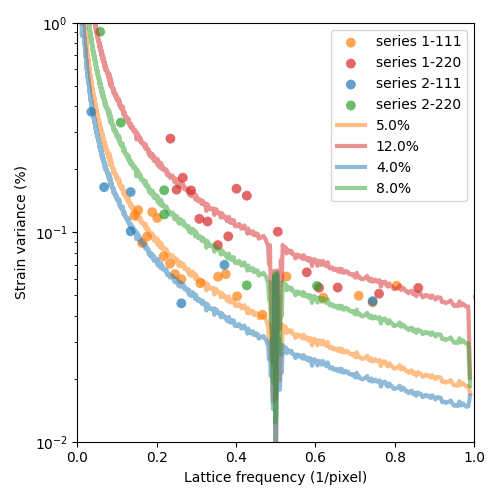

In [34]:
fig_data_c, ax_data_c = plt.subplots(figsize=(5, 5))

bla = [plt.cm.tab10(1), plt.cm.tab10(3), plt.cm.tab10(0), plt.cm.tab10(2)]
    
ax_data_c.scatter(p_1 / 313, 100 * series_1_111, color=plt.cm.tab10(1), s=50, alpha=0.7, edgecolors='none', label='series 1-111')
ax_data_c.scatter(p_1 / 192, 100 * series_1_220, color=plt.cm.tab10(3), s=50, alpha=0.7, edgecolors='none', label='series 1-220')
ax_data_c.scatter(p_2 / 313, 100 * series_2_111, color=plt.cm.tab10(0), s=50, alpha=0.7, edgecolors='none', label='series 2-111')
ax_data_c.scatter(p_2 / 192, 100 * series_2_220, color=plt.cm.tab10(2), s=50, alpha=0.7, edgecolors='none', label='series 2-220')

for i,sensitivity in enumerate(all_sensitivity):
    ax_data_c.plot(freq, sensitivity, lw=3, label=str(phase_noise_label[i] * 100) + '%', alpha=0.5, color=bla[i])

ax_data_c.set_xlim(0.0, 1.0)
ax_data_c.set_xlabel('Lattice frequency (1/pixel)')
ax_data_c.set_ylabel('Strain variance (%)')

ax_data_c.set_yscale('log')
ax_data_c.set_ylim(0.01, 1)

ax_data_c.legend()

fig_data_c.tight_layout()
fig_data_c.savefig('results/Strain_variance_exp_and_sim_with_lattice_frequency.png', dpi=300)

plt.show()

### Random phase noise and saturation model

Extraction of the strain variance with sampling curve at certain phase noise + saturation level qualitatively matching the experiment

In [35]:
phase_noise_cor = [0.035 * (2 * np.pi), 0.08 * (2 * np.pi), 0.025 * (2 * np.pi), 0.06 * (2 * np.pi)]
phase_noise_cor_label = ['3.5', '8.0', '2.5', '6.0']
constant_noise = 0.03
all_sensitivity_cor = []
all_sensitivity_init = []

for level in phase_noise_cor:
    sensitivity_init = []
    sensitivity_cor = []
    for j, element in enumerate(freq):
        sensitivity_init.append((all_coefs[j][0] * level + all_coefs[j][1]) * 100)
        sensitivity_cor.append((all_coefs[j][0] * level + all_coefs[j][1]) * 100 + constant_noise) 
    all_sensitivity_cor.append(sensitivity_cor)
    all_sensitivity_init.append(sensitivity_init)

<IPython.core.display.Javascript object>


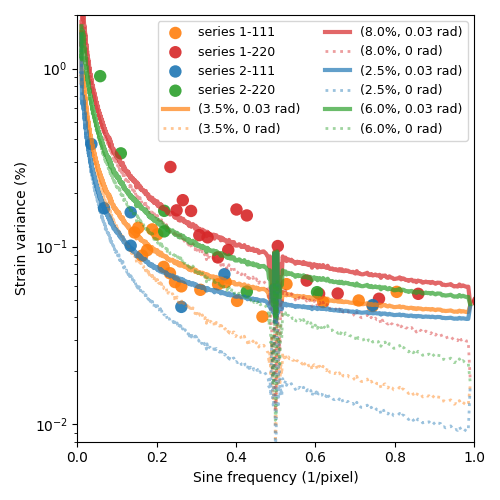

In [36]:
fig_data_d, ax_data_d = plt.subplots(figsize=(5, 5))

bla = [plt.cm.tab10(1), plt.cm.tab10(3), plt.cm.tab10(0), plt.cm.tab10(2)]
    
ax_data_d.scatter(p_1 / 313, 100 * series_1_111, color=plt.cm.tab10(1), s=80, alpha=0.9, edgecolors='none', label='series 1-111')
ax_data_d.scatter(p_1 / 192, 100 * series_1_220, color=plt.cm.tab10(3), s=80, alpha=0.9, edgecolors='none', label='series 1-220')
ax_data_d.scatter(p_2 / 313, 100 * series_2_111, color=plt.cm.tab10(0), s=80, alpha=0.9, edgecolors='none', label='series 2-111')
ax_data_d.scatter(p_2 / 192, 100 * series_2_220, color=plt.cm.tab10(2), s=80, alpha=0.9, edgecolors='none', label='series 2-220')

for i,sensitivity_cor in enumerate(all_sensitivity_cor):
    ax_data_d.plot(freq, sensitivity_cor, lw=3, label='(' + phase_noise_cor_label[i] + '%, 0.03 rad)', alpha=0.7, color=bla[i])
    ax_data_d.plot(freq, all_sensitivity_init[i], lw=2, label='(' + phase_noise_cor_label[i] + '%, 0 rad)', alpha=0.45, color=bla[i], ls='dotted')

ax_data_d.set_xlim(0.0, 1.0)
ax_data_d.set_xlabel('Sine frequency (1/pixel)')
ax_data_d.set_ylabel('Strain variance (%)')

ax_data_d.set_yscale('log')
ax_data_d.set_ylim(0.008, 2)

ax_data_d.legend(ncol=2, fontsize=9, loc=0)

fig_data_d.tight_layout()
fig_data_d.savefig('results/Strain_variance_exp_and_sim_with_lattice_frequency_const_phase_comp.png', dpi=300)

plt.show()